In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sl
%matplotlib inline
import scipy as sc
import math as ma
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns #spezielle Graphikdarstellungen
import statsmodels.api as sm
import statsmodels.stats.api as sms

Ziel: eigenes 3-layer MLP auf Basis der gelernten Konzepte!

Read: Tariq Rashid: "Make your own Neural Network"


Jetzt werden die einzelnen Bestandteile eines 3-Layer MLPs zusammengesetzt...  

Die Klasse "MLP" sollte mindestens drei Eigenschaften haben:  

1) Initialisierung der Gewichte mit Zufallszahlen  
2) Training = Gewichtanpassung anhand von Trainingsbeispielen  
3) In-Out Abfrage: wird ein Input ins trainierte Netz eingespeist soll eine Ausgabe erfolgen    

Also sind die Grundelemente der Klasse wie folgt zu definieren:

In [2]:
#class definition für Neural Network object
class neuralNetwork:

    #Initialization 
    def __init__():
        pass

    #Training 
    def train():
        pass 

    #Query
    def query():
        pass

Zunächst soll die Initialisierung durchgeführt werden.  
Die Anzahl der Gewichte in den Matrizen hängt von der Dimension des Inputs und der Anzahl der Neuronen in der Hidden und Output-Schicht ab:  

       -> freie Parameter = Meta-Parameter  
       
Die Lernrate ist ein weiterer wichtiger Parameter, der berücksichtigt werden muß.

In [3]:
#class definition für Neural Network object 
class neuralNetwork:

    #Initialisierung

    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):

        #setze Nummer der nodes in jeder input, hidden & output layer
    
        self.inodes = inputnodes 
        #self sorgt dafür, daß die Funktion beim Erzeugen dem richtigen Objekt zugewiesen wir
        self.hnodes = hiddennodes 
        self.onodes = outputnodes
        #learning rate 
        self.lr = learningrate 
        pass
    
    #Training 
    def train():
        pass
    
    #Query
    def query():
        pass
                

jetzt müssen die entsprechenden Gewichtsmatrizen zwischen Input und Hidden (Größe hiddennodes x inputnodes) und Hidden und Output (Größe outputnodes x hiddennodes) angelegt und für den Anfang mit zufälligen kleinen Gewichten belegt werden.

In [4]:
#class definition für Neural Network object
class neuralNetwork:
    #Initialisierung
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
                 
        #setze Nummer der nodes in jeder input, hidden & output layer

        self.inodes = inputnodes
        self.hnodes = hiddennodes 
        self.onodes = outputnodes
        #Gewichtmatrizen input->hidden wih und hidden->output who
        #die Gewichte innerhalb der arrays sind w_i_j,
        #womit das Neuron i mit dem j-ten der nächsten Schicht verbunden wird
        self.wih = np.random.normal(0.0, pow(self.hnodes,-0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes,-0.5), (self.onodes, self.hnodes))
        
    
        #learning rate 
        self.lr = learningrate 
        pass
    
    #Training 
    def train():
        pass
    #Query
    def query():
        pass
               

...das Einzige was für die Initialisierung jetzt noch fehlt sind die Definitionen der Aktivierungsfunktionen, die in der Hidden und Output-Schicht verwendet werden sollen...
  

In [5]:
#class definition für Neural Network object 

class neuralNetwork:
    
    #Initialisierung
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #setze Nummer der nodes in jeder input, hidden & output layer
        self.inodes = inputnodes #self sorgt dafür, daß die Funktion beim Erzeugen dem richtigen Objekt zugewiesen wird                     
        self.hnodes = hiddennodes 
        self.onodes = outputnodes
    
        #Gewichtmatrizen input->hidden wih und hidden->output who
        #die Gewichte innerhalb der arrays sind w_i_j,
        #womit das Neuron i mit dem j-ten der nächsten Schicht verbunden wird
    
        self.wih = np.random.normal(0.0, pow(self.hnodes,-0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes,-0.5), (self.onodes, self.hnodes))
    
    #learning rate 
        self.lr = learningrate 
        pass
    
    #Aktivierungsfunktion der Hidden Schicht z.B. Sigmoid (logistic activation) Funktion
    #gebräuchlich wäre auch tanh oder ReLU
    #hier wird diese Aktivierung auch in der Ausgabeschicht verwendet

        self.activation_function = lambda x: special.expit(x) #lambda sorgt dafür, Fkt. anonym bleibt
        pass

    #Aktivierungsfunktion der Output Schicht - hängt stark vom Problem und der Loss-Funktion ab
    #1) Regression: square Loss + Identity
    #2) Klassifikation: cross entropy loss + sigmoid/softmax
    
    #Training 
    def train():
        pass
    
    #Query
    def query():
        pass

Um die bisherigen Schritte testen zu können ist es geschickt erstmal an der Query-Funktion weiterzuarbeiten.
Dann könnte man einen Vorwärtspfad durch das initialisierte Netz durchlaufen und eine Ausgabe generieren.
Der Query-Funktion müssen nur die Inputs übergeben werden...
                 

In [6]:
#class definition für Neural Network object 

class neuralNetwork:
#Initialisierung
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #setze Nummer der nodes in jeder input, hidden & output layer
        self.inodes = inputnodes 
        self.hnodes = hiddennodes 
        self.onodes = outputnodes
    
        #Gewichtmatrizen input->hidden wih und hidden->output who
        #die Gewichte innerhalb der arrays sind w_i_j,
        #womit das Neuron i mit dem j-ten der nächsten Schicht verbunden wird
        self.wih = np.random.normal(0.0, pow(self.hnodes,-0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes,-0.5), (self.onodes, self.hnodes))
    
        #learning rate 
        self.lr = learningrate 
        pass
    
        #Aktivierungsfunktion der Hidden Schicht z.B. Sigmoid (logistic activation) Funktion
        #gebräuchlich wäre auch tanh oder ReLU
        #hier wird diese Aktivierung auch in der Ausgabeschicht verwendet
        self.activation_function = lambda x: special.expit(x) #lambda sorgt dafür, Fkt. anonym bleibt
        pass

        #Aktivierungsfunktion der Output Schicht - hängt stark vom Problem und der Loss-Funktion ab
    
        #1) Regression: square Loss + Identity
        #2) Klassifikation: cross entropy loss
        
    #Training 
    def train():
        pass

    #Query
    def query(self, inputs_list):
   
        #sicherstellen, daß die Liste der Inputs ein 2D NumPy array ist 
        #für die anschl. Rechnungen muß das array noch transponiert werden 
        inputs = np.array(inputs_list, ndmin=2).T
        
        #Berechnung der Eingangssignale in die Hiddenschicht 
        #d.h. Multiplikation der ersten Matrix mit dem Input-array 
        hidden_inputs = np.dot(self.wih, inputs)
        
        #Berechnung der Ausgangssignale der Hiddenschicht
        #d.h. Anwendung der Aktivierungsfunktion
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #Berechnung der Eingangssignale in die Output-Schicht 
        final_inputs = np.dot(self.who, hidden_outputs)
        
        #Berechnung der Ausgangssignale der Output-Schicht 
        #d.h. Anwendung der Aktivierungsfunktion 
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs 
        pass
         

jetzt mal ein allererster Test:  
1) Generieren eines speziellen Neuro-Objektes aus der oben definierten Klasse  
2) Einsetzen von einem zufälligen Vektor mit geeigneter Dimension
           

In [7]:
#Festlegen der Neuro-Struktur durch Definition der Neuronenzahlen
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

#Lernrate 
learning_rate = 0.3
#Erstellen des konkreten Neuro-Objektes
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

jetzt kann man einen Vorwärtspfad berechnen und das Ergebnis ausgeben lassen...

In [8]:
n.query([1.2, 2.0,1])


array([[0.77490519],
       [0.30535185],
       [0.63949353]])

## Letzter fehlender Schritt:  

## Training des Netzes!  

Für das Training sind eigentlich nur zwei Dinge relevant:  
die Inputs und natürlich die Targets - an denen wird der Fehler berechnet und hinterher für die Backpropagation genutzt
   
    

In [17]:
#class definition für Neural Network object
class neuralNetwork:
    #Initialisierung
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #setze Nummer der nodes in jeder input, hidden & output layer
        self.inodes = inputnodes #self sorgt dafür, daß die Funktion beim Erzeugen dem richtigen Objekt zugewiesen wird
        self.hnodes = hiddennodes 
        self.onodes = outputnodes

        #Gewichtmatrizen input->hidden wih und hidden->output who
        #die Gewichte innerhalb der arrays sind w_i_j,
        #womit das Neuron i mit dem j-ten der nächsten Schicht verbunden wird
        
        self.wih = np.random.normal(0.0, pow(self.hnodes,-0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes,-0.5), (self.onodes, self.hnodes))
        
        #learning rate 
        self.lr = learningrate 
        pass
    
        #Aktivierungsfunktion der Hidden Schicht z.B. Sigmoid (logistic activation) Funktion
        #gebräuchlich wäre auch tanh oder ReLU
        #hier wird diese Aktivierung auch in der Ausgabeschicht verwendet
        
        self.activation_function = lambda x: special.expit(x) #lambda sorgt dafür, Fkt. anonym bleibt
        pass
    
        #Aktivierungsfunktion der Output Schicht - hängt stark vom Problem und der Loss-Funktion ab
        #1) Regression: square Loss + Identity
        #2) Klassifikation: cross entropy loss + sigmoid/softmax
        
    #Training
    def train(self, inputs_list, targets_list):
        
        #Inputs und Targets als 2D NumPy array schreiben 
        inputs = np.array(inputs_list, ndmin=2).T 
        targets = np.array(targets_list, ndmin=2).T
        
        #Eingangssignale in die Hidden Schicht
        hidden_inputs = np.dot(self.wih, inputs) #Ausgangssignale aus der Hiddenschicht
        hidden_outputs = self.activation_function(hidden_inputs) #Eingangssignale in Ausgabeschicht
        final_inputs = np.dot(self.who, hidden_outputs)
 
        #Berechnung der Ausgangssignale der Output-Schicht
        #d.h. Anwendung der Aktivierungsfunktion
        final_outputs = self.activation_function_out(final_inputs)
        
        #Berechnung des Fehlers Output-Target oder Target-Output - keine spezifische Fehlerfunktion
        output_errors = final_outputs - targets
        
        #Berechnung der lokalen Fehler im Backpropagation Fehlerfluß: 
        errors_hid = weights.T_hid_out*errors_out
        hidden_errors = np.dot(self.who.T, output_errors)
        
        #Update der Gewichte von Hidden nach Output auf Basis der berechneten Fehler
        self.who += self.lr*np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
       
        # += heißt einfach nur zähle zur Variable die neue Menge dazu: x +=3 -> x = x+3
        
        #Update der Gewichte von Input nach Hidden auf Basis der berechneten Fehler
        self.wih += self.lr*np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        pass
    
    #Query
    def query(self, inputs_list):
        
        #sicherstellen, daß die Liste der Inputs ein 2D NumPy array ist 
        #für die anschl. Rechnungen muß das array noch transponiert werden 
        inputs = np.array(inputs_list, ndmin=2).T
        
        #Berechnung der Eingangssignale in die Hiddenschicht 
        #d.h. Multiplikation der ersten Matrix mit dem Input-array 
        hidden_inputs = np.dot(self.wih, inputs)
        
        #Berechnung der Ausgangssignale der Hiddenschicht
        #d.h. Anwendung der Aktivierungsfunktion
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #Berechnung der Eingangssignale in die Output-Schicht 
        final_inputs = np.dot(self.who, hidden_outputs)
                  
        #Berechnung der Ausgangssignale der Output-Schicht
        #d.h. Anwendung der Aktivierungsfunktion 
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs 
        pass

Erster Check der Performance an einem standardmäßigen Klassifikationsbeispiel:  
    handgeschriebene Zahlen erkennen

In [18]:
#Testdaten einlesen

data_file_test = open('../Daten/MNIST/mnist_test.csv', 'r')
data_list_test = data_file_test.readlines() 
data_file_test.close()

#Trainingsdaten einlesen
data_file_train = open('../Daten/MNIST/mnist_train.csv', 'r') 
data_list_train = data_file_train.readlines()
data_file_train.close()

#Check der Dimensionen 
print(len(data_list_test)) #10000 Testdatensätze 
print(len(data_list_train)) #60000 Trainingsdatensätze

10000
60000


In [11]:
data_list_train;
data_list_test[0]; 
#Datenstruktur: jedes Element ist ein langer String 
#mit den kommaseparierten Intensitäten und der Klasse vorne 

die Struktur der Daten ist wie folgt:
     
     
'7 an der ersten Stelle ist das Label - es handelt sich also um ein Bild der handgeschriebenen Zahl 7  

die folgenden 28x28 = 784 Zahlen sind die kodierten Farbwerte der einzelnen Pixel des Bildes (Wertebereich: 0-255)  

Jetzt könnte man sich erstmal so ein Bild ansehen.  
Dazu muß das Format der einzelnen Pattern geändert werden:  

1) den langen kommaseparierten Datensatz in Einzelwerte splitten  
2) den ersten Wert als Target behalten  
3) Rest der 28x28 Datensätze in ein 28x28 array umformen  

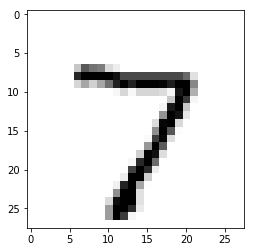

In [19]:
all_values_first_example = data_list_test[0].split(',') #Daten aufteilen
image_array = np.asfarray(all_values_first_example[1:]).reshape((28,28)) #28x28 array draus machen
plt.imshow(image_array, cmap='Greys', interpolation = 'None'); #plotten

In [21]:
len(all_values_first_example[1:])

784

Jetzt erstmal eine kleine Testmenge daraus 100 Trainingsbeispiele und 10 Testdatensätze

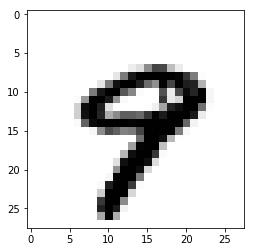

In [22]:
data_list_train_small = data_list_train[0:100] 
data_list_test_small = data_list_test[0:10]
                                 
len(data_list_train_small[0])

all_values_first_example1 = data_list_test_small[9].split(',') #Daten aufteilen 
image_array1 = np.asfarray(all_values_first_example1[1:]).reshape((28,28)) #28x28 array draus machen
plt.imshow(image_array1, cmap='Greys', interpolation = 'None'); #plotten
 

Die Wertebereiche sind für Neuro nicht gut geeignet also: skalieren der Intensitätswerte auf [0,1]  
Beispiel:

In [15]:
scaled_example = (np.asfarray(all_values_first_example1[1:])/255.0 * 0.99) + 0.01
scaled_example;

Jetzt noch das Target generieren:  
Sinnvoll ist es hier als Zielfunktion eine Liste zu generieren.  
Es gibt Zahlen von 0 - 9, also 10 verschiedene Zielklassen. 

Als Target-Vektor wird standardmäßig ein 10-dim Vektor gewählt,  
der an allen Stellen 0 hat außer an der Stelle der zutreffenden Klasse.  
Dort ist der Wert dann 1  
 -> Stichwort: One-Hot – Codierung

In [16]:
#10 verschiedene Klassen 
onodes = 10

#Vektor der Länge 10 mit lauter Nullen -
# 0.01 sorgt nur dafür, daß keine Probleme mit z.B. teilen durch Null entstehen
targets = np.zeros(onodes) + 0.01

#jetzt wird der 0-te Eintrag gelesen = Targetklasse
#dann wird eine ganze Zahl draus gemacht
#dann wird im Null-Vektor an dieser Stelle eine 1 (bzw. 0.99 eingesetzt)
targets[int(all_values_first_example1[0])] = 0.99 
print(targets)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99]


 Jetzt kann man im Prinzip das erste Beipiel mit dem simplen MLP bearbeiten...

## das machen wir dann nächstes Mal - die Spannung steigt! :-)